<a href="https://colab.research.google.com/github/JamilyaSultan/INDE-597-Deep-and-Reinforcement-Learning/blob/main/Copy_of_Week_2_3_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# In this notebook we use tensorflow for a 
# binary classification problem. 

import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

# Import the IMDB dataset 
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=
                                                                      10_000)



In [ ]:
train_data[0];

In [ ]:
# Verify lengths 
max([max(seq) for seq in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

def decoded_view(data, i):
    view = " ".join([reverse_word_index.get(j-3, "?") for j in data[i]])
    return view

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_view(train_data, 0)

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
# Multi-hot Encode the input vectors
def vectorize_sequence(sequences, dimension=10_000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

# Vectorize the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
from tensorflow import keras 
from tensorflow.keras import layers

# Instantiate the model with your layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model with optimizer and loss
model.compile(optimizer="rmsprop", 
              loss="binary_crossentropy", # Just like logistic regr
              metrics=["accuracy"])

In [ ]:
# Setting up validation data
x_val = x_train[:10_000]
partial_x_train = x_train[10_000:]

y_val = y_train[:10_000]
partial_y_train = y_train[10_000:]

In [ ]:
# Fit (or train) the model and track metrics
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20, 
                    batch_size=512,
                    validation_data=(x_val, y_val))



Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.4922 - accuracy: 0.7830 - val_loss: 0.3610 - val_accuracy: 0.8694
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2800 - accuracy: 0.9043 - val_loss: 0.3150 - val_accuracy: 0.8763
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2071 - accuracy: 0.9313 - val_loss: 0.3157 - val_accuracy: 0.8733
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1599 - accuracy: 0.9496 - val_loss: 0.2790 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1337 - accuracy: 0.9579 - val_loss: 0.2983 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1082 - accuracy: 0.9667 - val_loss: 0.3159 - val_accuracy: 0.8795
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0876 - accuracy: 0.9745 - val_loss: 0.3243 - val_accuracy: 0.8815
Epoch 8/20
30

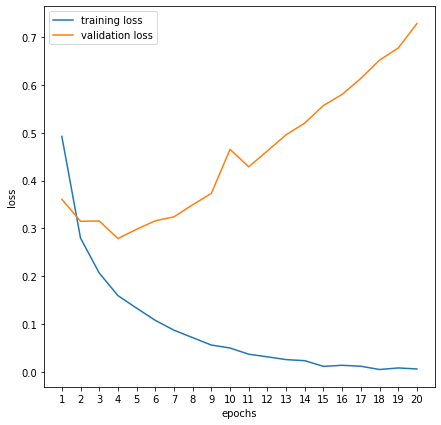

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(7, 7))
plt.plot(epochs, loss_values, label = "training loss")
plt.plot(epochs, val_loss_values, label = "validation loss")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

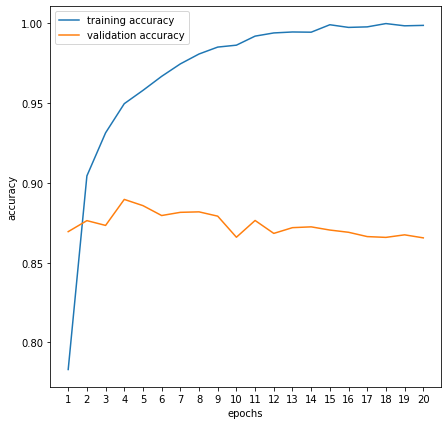

In [ ]:
acc = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

plt.figure(figsize=(7, 7))
plt.plot(epochs, acc, label = "training accuracy")
plt.plot(epochs, val_acc_values, label = "validation accuracy")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
# Instantiate the model
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"), 
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="rmsprop",
             loss="binary_crossentropy", # Same as logistic regression!
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 3s 38ms/step - loss: 0.4366 - accuracy: 0.8185 - val_loss: 0.2576 - val_accuracy: 0.9153
Epoch 2/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2471 - accuracy: 0.9104 - val_loss: 0.1823 - val_accuracy: 0.9390
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.1912 - accuracy: 0.9305 - val_loss: 0.1373 - val_accuracy: 0.9586
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3250 - accuracy: 0.8745


[0.3249948024749756, 0.8745200037956238]

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

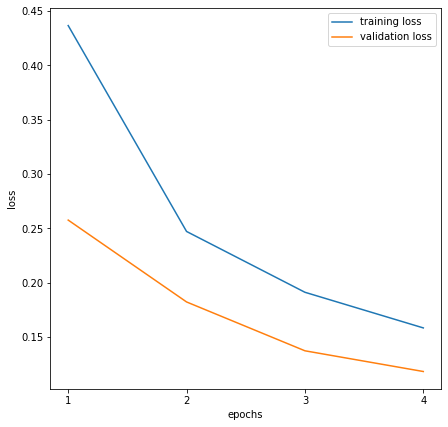

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(7, 7))
plt.plot(epochs, loss_values, label = "training loss")
plt.plot(epochs, val_loss_values, label = "validation loss")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

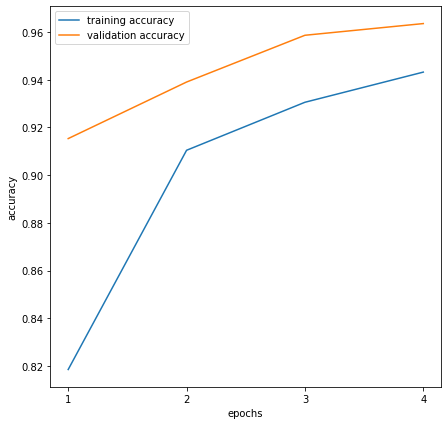

In [ ]:
acc = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

plt.figure(figsize=(7, 7))
plt.plot(epochs, acc, label = "training accuracy")
plt.plot(epochs, val_acc_values, label = "validation accuracy")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
# Instantiate the model
model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"), 
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="rmsprop",
             loss="mse", # Same as logistic regression!
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 3s 45ms/step - loss: 0.1263 - accuracy: 0.8236 - val_loss: 0.0675 - val_accuracy: 0.9132
Epoch 2/4
49/49 [==============================] - 2s 49ms/step - loss: 0.0658 - accuracy: 0.9126 - val_loss: 0.0387 - val_accuracy: 0.9553
Epoch 3/4
49/49 [==============================] - 2s 39ms/step - loss: 0.0509 - accuracy: 0.9345 - val_loss: 0.0758 - val_accuracy: 0.8959
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.1053 - accuracy: 0.8676


[0.10528577864170074, 0.8675600290298462]

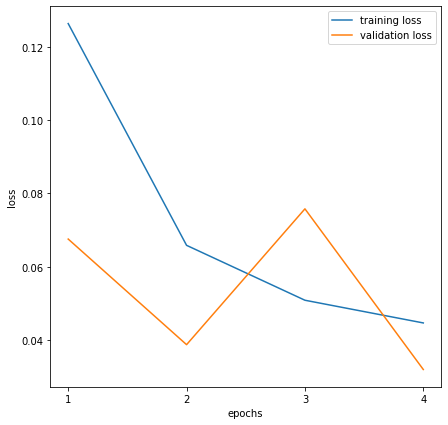

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(7, 7))
plt.plot(epochs, loss_values, label = "training loss")
plt.plot(epochs, val_loss_values, label = "validation loss")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

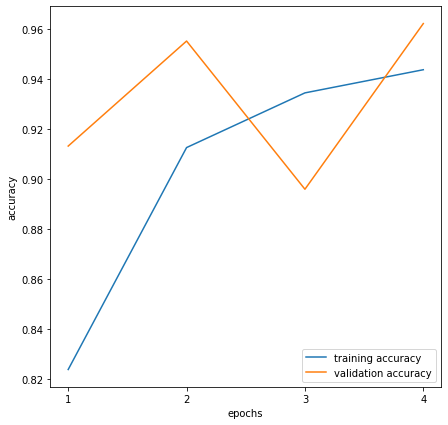

In [ ]:
acc = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

plt.figure(figsize=(7, 7))
plt.plot(epochs, acc, label = "training accuracy")
plt.plot(epochs, val_acc_values, label = "validation accuracy")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
# Instantiate the model
model = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"), 
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="rmsprop",
             loss="mse", 
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 3s 47ms/step - loss: 0.1283 - accuracy: 0.8158
Epoch 2/4
49/49 [==============================] - 2s 42ms/step - loss: 0.0674 - accuracy: 0.9109
Epoch 3/4
49/49 [==============================] - 2s 43ms/step - loss: 0.0525 - accuracy: 0.9306
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.0998 - accuracy: 0.8703


[0.09983648359775543, 0.8702800273895264]

In [ ]:
from tensorflow import keras 
from tensorflow.keras import layers

# Instantiate the model
model = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"), 
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="rmsprop",
             loss="mse", 
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 4s 62ms/step - loss: 0.1299 - accuracy: 0.8172 - val_loss: 0.0573 - val_accuracy: 0.9298
Epoch 2/4
49/49 [==============================] - 2s 47ms/step - loss: 0.0680 - accuracy: 0.9108 - val_loss: 0.0446 - val_accuracy: 0.9462
Epoch 3/4
49/49 [==============================] - 2s 48ms/step - loss: 0.0519 - accuracy: 0.9318 - val_loss: 0.0319 - val_accuracy: 0.9639
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.0959 - accuracy: 0.8761


[0.09585527330636978, 0.8761199712753296]

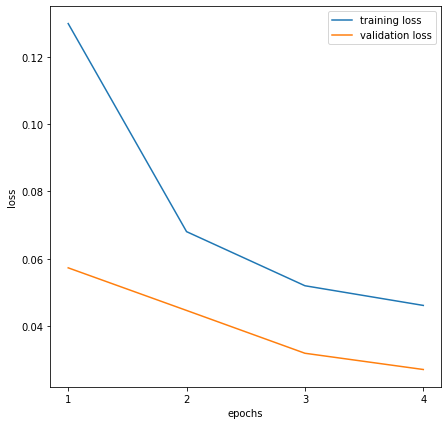

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(7, 7))
plt.plot(epochs, loss_values, label = "training loss")
plt.plot(epochs, val_loss_values, label = "validation loss")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

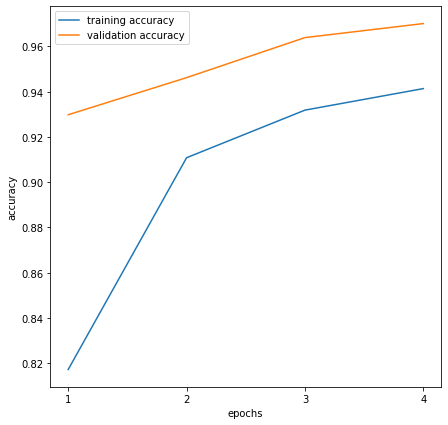

In [ ]:
acc = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

plt.figure(figsize=(7, 7))
plt.plot(epochs, acc, label = "training accuracy")
plt.plot(epochs, val_acc_values, label = "validation accuracy")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()